In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('data/train.csv')


<h2>Sale price distribution</h2>

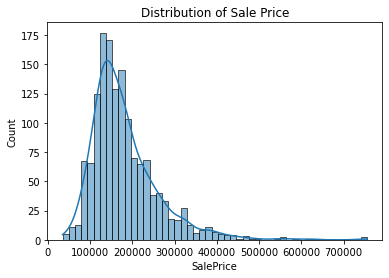

In [2]:
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.show()
#gamma distribution


<h2>Numerical Features</h2>

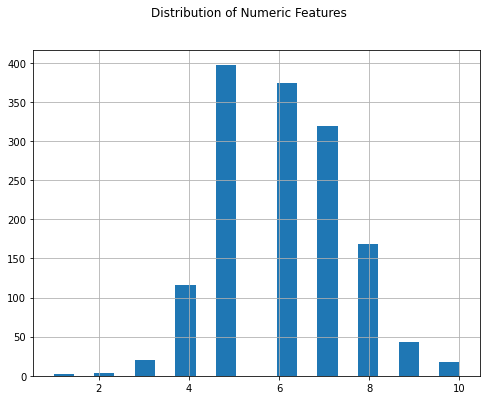

In [3]:
# Feature Distribution
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data['OverallQual'].hist(bins=20, figsize=(8, 6))
plt.suptitle("Distribution of Numeric Features")
plt.show()

<h3>Feature Correlation</h3>

Top Features Correlated with SalePrice:


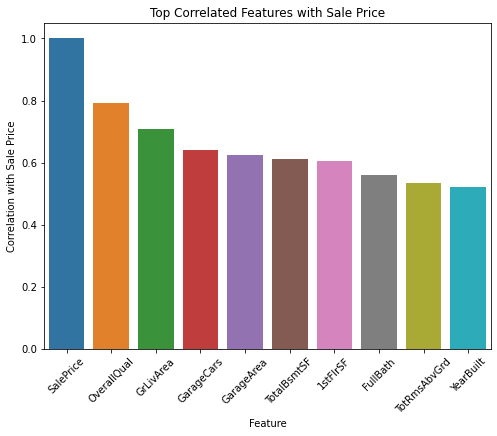

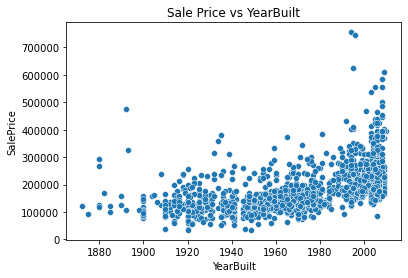

In [4]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()

corr_with_target = numeric_data.corr()['SalePrice'].sort_values(ascending=False)
print("Top Features Correlated with SalePrice:")
top_corr=corr_with_target.head(10)

#Top features bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.index, y=top_corr.values)
plt.title("Top Correlated Features with Sale Price")
plt.xlabel("Feature")
plt.ylabel("Correlation with Sale Price")
plt.xticks(rotation=45)
plt.show()

 # Top correlated features excluding SalePrice

feature='YearBuilt' #Change this to whatever numerical feature
sns.scatterplot(x=data['YearBuilt'], y=data['SalePrice'])
plt.title(f'Sale Price vs {feature}')
plt.show()


<h3>Missing Values</h3>

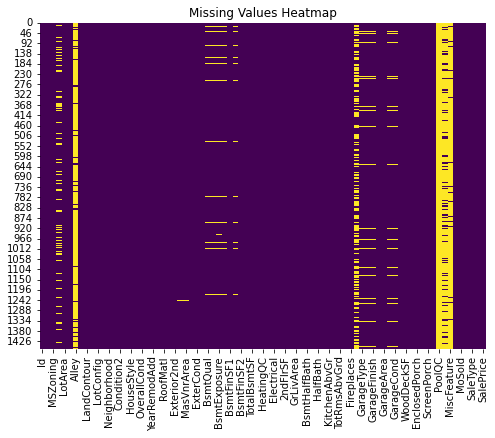

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

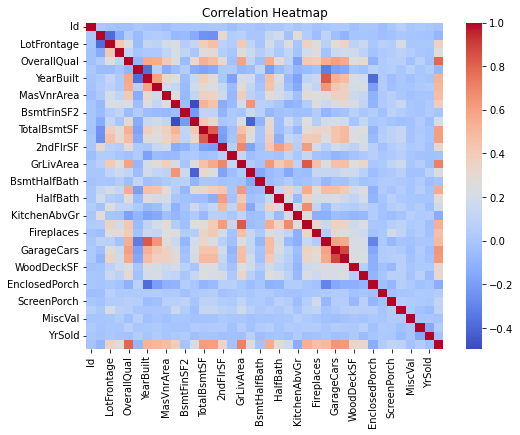

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

<h2>Categorical Features</h2>

In [7]:
#Print categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [8]:
#Unique values for each category
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Alley: [nan 'Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['Vi

In [9]:
# Summarize SalePrice by each category in categorical columns
for col in categorical_cols:
    grouped = data.groupby(col)['SalePrice'].mean().sort_values(ascending=False)
    print(f"\n{col}:\n")
    print(grouped)


MSZoning:

MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64

Street:

Street
Pave    181130.538514
Grvl    130190.500000
Name: SalePrice, dtype: float64

Alley:

Alley
Pave    168000.585366
Grvl    122219.080000
Name: SalePrice, dtype: float64

LotShape:

LotShape
IR2    239833.365854
IR3    216036.500000
IR1    206101.665289
Reg    164754.818378
Name: SalePrice, dtype: float64

LandContour:

LandContour
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Bnk    143104.079365
Name: SalePrice, dtype: float64

Utilities:

Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64

LotConfig:

LotConfig
CulDSac    223854.617021
FR3        208475.000000
Corner     181623.425856
FR2        177934.574468
Inside     176938.047529
Name: SalePrice, dtype: float64

LandSlope:

LandSlope
Sev    204379.230769
Mod    196734.138462
Gtl    17995



BsmtCond:

BsmtCond
Gd    213599.907692
TA    183632.620900
Fa    121809.533333
Po     64000.000000
Name: SalePrice, dtype: float64

BsmtExposure:

BsmtExposure
Gd    257689.805970
Av    206643.420814
Mn    192789.657895
No    165652.295908
Name: SalePrice, dtype: float64

BsmtFinType1:

BsmtFinType1
GLQ    235413.720096
Unf    170670.576744
ALQ    161573.068182
LwQ    151852.702703
BLQ    149493.655405
Rec    146889.248120
Name: SalePrice, dtype: float64

BsmtFinType2:

BsmtFinType2
ALQ    209942.105263
Unf    184694.690287
GLQ    180982.142857
Rec    164917.129630
LwQ    164364.130435
BLQ    151101.000000
Name: SalePrice, dtype: float64

Heating:

Heating
GasA     182021.195378
GasW     166632.166667
OthW     125750.000000
Wall      92100.000000
Grav      75271.428571
Floor     72500.000000
Name: SalePrice, dtype: float64

HeatingQC:

HeatingQC
Ex    214914.429150
Gd    156858.871369
TA    142362.876168
Fa    123919.489796
Po     87000.000000
Name: SalePrice, dtype: float64

Centra

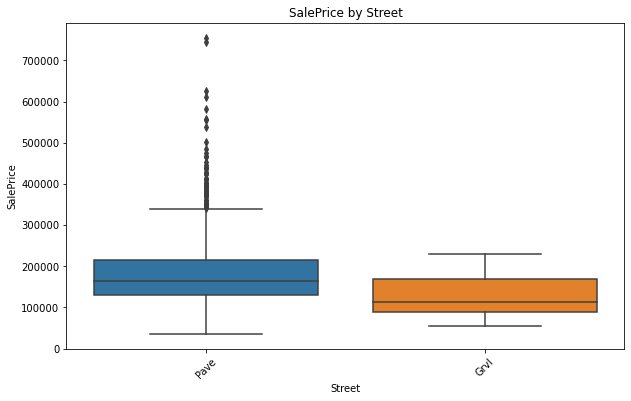

In [10]:
# Plot SalePrice distribution for specific categories (change x for category name)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Street', y='SalePrice', data=data)
plt.xticks(rotation=45)
plt.title(f"SalePrice by Street")
plt.show()


In [11]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Compute correlations with SalePrice
correlations = data_encoded.corr()['SalePrice'].sort_values(ascending=False)

# Display top positively and negatively correlated features
print("Top Correlated Features with SalePrice:\n")
print(correlations.head(10))  # Most positively correlated
print("\nMost Negatively Correlated Features with SalePrice:\n")
print(correlations.tail(10))  # Most negatively correlated


Top Correlated Features with SalePrice:

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Most Negatively Correlated Features with SalePrice:

LotShape_Reg        -0.267672
MSZoning_RM         -0.288065
HeatingQC_TA        -0.312677
Foundation_CBlock   -0.343263
GarageType_Detchd   -0.354141
MasVnrType_None     -0.374468
GarageFinish_Unf    -0.410608
BsmtQual_TA         -0.452394
KitchenQual_TA      -0.519298
ExterQual_TA        -0.589044
Name: SalePrice, dtype: float64


<h2>Feature Importance</h2>

<h3>Random Forest</h3>


Top 10 Features Affecting Sale Price:

OverallQual    0.559346
GrLivArea      0.121949
2ndFlrSF       0.033674
TotalBsmtSF    0.033523
BsmtFinSF1     0.029582
1stFlrSF       0.027272
LotArea        0.017527
GarageArea     0.015882
GarageCars     0.012788
YearBuilt      0.012668
dtype: float64


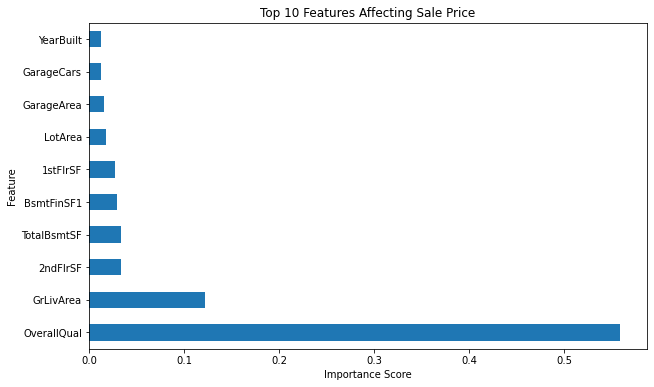

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Prepare data for modeling
X_rf = data_encoded.drop('SalePrice', axis=1)
imputer = SimpleImputer(strategy='mean')
X_rf = pd.DataFrame(imputer.fit_transform(X_rf), columns=X_rf.columns)
y_rf = data['SalePrice']
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_trainrf, y_trainrf)

# Train a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_trainrf, y_trainrf)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X_rf.columns).sort_values(ascending=False)

# Display top 10 most important features
print("\nTop 10 Features Affecting Sale Price:\n")
print(importances.head(10))

# Plot feature importance
importances.head(10).plot(kind='barh', figsize=(10, 6))
plt.title("Top 10 Features Affecting Sale Price")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [13]:
print(X_rf.isnull().sum())
# Drop rows with NaN values
X_rf = X_rf.dropna()
y_rf = y_rf.loc[X_rf.index]
# Drop columns with NaN values
X_rf = X_rf.dropna(axis=1)


Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 246, dtype: int64


<h2>Models

<h3>Preprocessing

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, GammaRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import statsmodels.api as sm

train_data = pd.read_csv('data/train.csv')

#separate features and target vars
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)



print(X.shape)



#apply the preprocessing steps
X = preprocessor.fit_transform(X)

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

AttributeError: module 'numpy' has no attribute 'MachAr'

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load the dataset
train_data = pd.read_csv('data/train.csv')

# Separate features and target variable
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Debugging to ensure correct identification
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

# Define preprocessing pipelines for numeric and categorical features
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine the preprocessing pipelines in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

# Debugging: Check shape before preprocessing
print("Shape before preprocessing:", X.shape)

# Apply the preprocessing steps to the dataset
X = preprocessor.fit_transform(X)

# Convert sparse matrix to dense array if necessary
if hasattr(X, 'toarray'):
    X = X.toarray()

# Debugging: Check shape after preprocessing
print("Shape after preprocessing:", X.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debugging: Check resulting shapes of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Numeric Columns: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Categorical Columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinTy

<h3>Model 1: Sklearn normal linear regression

In [19]:
from sklearn.linear_model import LinearRegression

#Fit normal linear regression model and predict
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("LR Mean Squared Error:", rmse)
relative_error = rmse / y.mean()
print("Relative Error (as a percentage):", relative_error * 100, "%\n")


LR Mean Squared Error: 1377174035246529.0
Relative Error (as a percentage): 761201045830.3195 %



<h3>Model 2: Sklearn Gamma Regression

In [20]:
from sklearn.linear_model import GammaRegressor
#Fit Gamma linear regression model and predict
glr = GammaRegressor()
glr.fit(X_train, y_train)
y_pred = glr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("Gamma LR Mean Squared Error:", rmse)
relative_error = rmse / y.mean()
print("Relative Error (as a percentage):", relative_error * 100, "%")

#Cross validation score
gamma_cv = cross_val_score(glr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
gamma_cv_rmse = (-gamma_cv.mean())**0.5
print("Gamma CV RMSE:", gamma_cv_rmse)



Gamma LR Mean Squared Error: 33324.61093403055
Relative Error (as a percentage): 18.419406731213627 %
Gamma CV RMSE: 51660.507831653355


<h3>Model 1.5 The Data is logged

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Standard Linear Regression Model (already done)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Standard LR RMSE:", rmse)
relative_error = rmse / y.mean()
print("Standard LR Relative Error (as a percentage):", relative_error * 100, "%\n")

# Log-Transformed Linear Regression Model
# Apply log transformation to the target variable
# Train the model with the log-transformed target
lr_log = LinearRegression()
lr_log.fit(X_train, np.log(y_train + 1e-8))  # Add small constant to avoid log(0)

# Predict on the test set
y_pred_log = lr_log.predict(X_test)

# Clip predictions to avoid overflow during exponentiation
y_pred_log_clipped = np.clip(y_pred_log, -100, 100)
y_pred_log_exp = np.exp(y_pred_log_clipped)  # Reverse log transformation

# Sanity check
#print("Clipped predictions:", y_pred_log_clipped)
#print("Exponentiated predictions (y_pred_log_exp):", y_pred_log_exp)

# Calculate RMSE and Relative Error
mse_log = mean_squared_error(y_test, y_pred_log_exp)
rmse_log = np.sqrt(mse_log)
print("Log-Transformed LR RMSE:", rmse_log)
relative_error_log = rmse_log / y.mean()
print("Log-Transformed LR Relative Error (as a percentage):", relative_error_log * 100, "%")



Standard LR RMSE: 1377174035246529.0
Standard LR Relative Error (as a percentage): 761201045830.3195 %

Log-Transformed LR RMSE: 2.2247015758200005e+42
Log-Transformed LR Relative Error (as a percentage): 1.2296522609587241e+39 %


<h3>Model 3: Statsmodels Gamma Regression

In [ ]:
# # Convert preprocessed data into pandas DataFrames for statsmodels compatibility
# # Use the feature names from preprocessing
# feature_names = preprocessor.get_feature_names_out()

# X_train_preprocessed = X_train.toarray()
# X_test_preprocessed = X_test.toarray()

# X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=feature_names)
# X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=feature_names)

# # Add a constant (intercept term)
# X_train_preprocessed = sm.add_constant(X_train_preprocessed)
# X_test_preprocessed = sm.add_constant(X_test_preprocessed)
# X_train_preprocessed.index = y_train.index

# # Fit a Gamma Regression model
# gamma_model = sm.GLM(y_train, X_train_preprocessed, family=sm.families.Gamma(sm.families.links.log()))
# gamma_results = gamma_model.fit()

# # Print model summary
# #print(gamma_results.summary())

# # Predict on the test set
# y_pred = gamma_results.predict(X_test_preprocessed)

# # Evaluate performance
# from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(y_test, y_pred)
# rmse=np.sqrt(mse)
# print("Gamma LR Mean Squared Error:", rmse)
# relative_error = rmse / y.mean()
# print("Relative Error (as a percentage):", relative_error * 100, "%")


<h3>Regularization

<h4>Sklearn Gamma with L2

In [ ]:
glrRidge = GammaRegressor(alpha=0.01, max_iter=100000)  # alpha is the L2 regularization strength
glrRidge.fit(X_train, y_train)
y_pred = glrRidge.predict(X_test)


# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Gamma LR Mean Squared Error:", rmse)
relative_error = rmse / y_test.mean()
print("Relative Error (as a percentage):", relative_error * 100, "%")


#Cross validation score
gamma_cv = cross_val_score(glrRidge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
gamma_cv_rmse = np.sqrt(-gamma_cv.mean())
print("CV RMSE:", gamma_cv_rmse)

Gamma LR Mean Squared Error: 23433.604562608885
Relative Error (as a percentage): 13.103125275750987 %
CV RMSE: 66796.46604056325


<h4>Sklearn Ridge Regression

In [153]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10, max_iter=1000)  # alpha is the L2 regularization strength
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Gamma LR Mean Squared Error:", rmse)
relative_error = rmse / y_test.mean()
print("Relative Error (as a percentage):", relative_error * 100, "%")


#Cross validation score
gamma_cv = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
gamma_cv_rmse = np.sqrt(-gamma_cv.mean())
print("CV RMSE:", gamma_cv_rmse)

Gamma LR Mean Squared Error: 30625.0249172097
Relative Error (as a percentage): 17.124277103467474 %
CV RMSE: 33858.969194019955


<h4>Sklearn ridge regression with cross validation

In [155]:
from sklearn.metrics import make_scorer, mean_squared_error
#  Define Ridge regression model

ridge = Ridge(alpha=10, max_iter=1000)  # alpha is the L2 regularization strength

# Define RMSE scoring function for cross-validation
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation
cv_rmse_scores = cross_val_score(ridge, X_train, y_train, cv=10, scoring=rmse_scorer)

# Calculate mean and standard deviation of RMSE scores
mean_rmse = np.mean(cv_rmse_scores)
std_rmse = np.std(cv_rmse_scores)

# Print cross-validation RMSE results
print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean RMSE: {mean_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")

# Fit model to training data
ridge.fit(X_train, y_train)

# Predict on test set
y_pred = ridge.predict(X_test)

# Calculate final test RMSE and relative error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test Set RMSE:", rmse)
relative_error = rmse / y_test.mean()
print("Relative Error (as a percentage):", relative_error * 100, "%")

Cross-Validation RMSE Scores: [22069.89455645 40918.34057    22382.27794698 41201.24919616
 62938.3431849  32106.93193959 25699.60330666 22744.74498879
 21891.7686849  21336.94247894]
Mean RMSE: 31329.00968533624
Standard Deviation of RMSE: 12842.23294515796
Test Set RMSE: 30625.0249172097
Relative Error (as a percentage): 17.124277103467474 %


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

<h2>Boostrap

In [226]:
# Function for bootstrapping
def bootstrap_predictions(model, X, y, n_bootstrap=1000):
    predictions = []
    for i in range(n_bootstrap):
        sample_indices = np.random.choice(range(X_train.shape[0]), X_train.shape[0], replace=True)
        X_sample = X[sample_indices]
        y_sample = y.iloc[sample_indices]
        model.fit(X_sample, y_sample)
        predictions.append(model.predict(X_test))
    return np.array(predictions)

# Bootstrap Lasso model
lasso_preds_bootstrap = bootstrap_predictions(ridge, X_train, y_train)
lower, upper = np.percentile(lasso_preds_bootstrap, [2.5, 97.5], axis=0)
print("95% Confidence Interval for Lasso predictions: Lower =", lower.mean(), ", Upper =", upper.mean())


95% Confidence Interval for Lasso predictions: Lower = 158347.45232832257 , Upper = 195547.41049892822


How many of the y_test prices lie within the CI values that we make for every single value?

- I do not think we can use this for anything, but it is still good to have

In [229]:
# zip the lower and upper bound for every single observation
observations_margins = list(zip(lower.T, upper.T))

# iterate thorugh all observations and see if the actual price lies within our CI predictions
observations_prediction_cis_val = {}
counter = 0
for i in y_test:
    l, u = observations_margins[counter]
    observations_prediction_cis_val[counter] = False
    if i >= l and i <= u:
        observations_prediction_cis_val[counter] = True

    counter += 1

# count the precision of the predictions CI
from collections import Counter
observations_ranges_val_counter = Counter(list(observations_prediction_cis_val.values()))
total_predictions = sum(list(observations_ranges_val_counter.values()))

ci_precision = round(observations_ranges_val_counter[True] / total_predictions * 100, 2)
print(f'Confidence intervals precision: {ci_precision}%')

Confidence intervals precision: 64.38%
